## Implement Linear regression from scratch 

In [1]:
import numpy as np

# Step 1: Get the data set
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Step 2: Compute the mean of the X and y
mean_x = np.mean(x)
mean_y = np.mean(y)

In [5]:
m = np.sum((x-mean_x)*(y - mean_y))/np.sum((x-mean_x)**2) 

In [10]:
c = mean_y * m - mean_x

In [11]:
c

-0.6000000000000001

In [12]:
import numpy as np

# Coefficients for a pretend real estate market model
coefficients = np.array([50000, 3000, -2000, 15000])  # Assume b0, b1 for area, b2 for age, b3 for # bathrooms

# Data for a new house: [intercept, area, age, # bathrooms]
new_house = np.array([1, 150, 10, 2])

In [13]:
coefficients.T @ new_house

510000

In [14]:
import numpy as np

# given data
housing_data = np.array([[1800, 3], [2400, 4], [1416, 2], [3000, 5]])
prices = np.array([350000, 475000, 230000, 640000])

# adding 1s to our matrix
ones = np.ones(shape=(len(housing_data), 1))
X = np.append(ones, housing_data, axis=1)

# calculating coefficients
coefficients = np.linalg.inv(X.T @ X) @ X.T @ prices

# predicting prices
predicted_prices = X @ coefficients

# calculating residuals
residuals = prices - predicted_prices

# calculating total sum of squares
sst = np.sum((prices - np.mean(prices)) ** 2)

# calculating residual sum of squares
ssr = np.sum(residuals ** 2)

# calculating R^2
r2 = 1 - (ssr/sst)

print("Coefficients:", coefficients)
print("Predicted prices:", predicted_prices)
print("R^2:", r2)

Coefficients: [-91666.66666654    146.60493827  57037.03703703]
Predicted prices: [343333.3333334  488333.33333339 230000.00000008 633333.33333337]
R^2: 0.997113020727609


In [15]:
## Implementing Linear regression 

In [16]:
housing_data = np.array([[1800, 3], [2400, 4], [1416, 2], [3000, 5]])
prices = np.array([350000, 475000, 230000, 640000])

In [22]:
ones = np.ones(shape = (len(housing_data) , 1) )

In [26]:
X = np.append(ones , housing_data , axis = 1) 

In [27]:
X

array([[1.000e+00, 1.800e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 4.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 5.000e+00]])

In [28]:
coefficients = np.linalg.inv(X.T @ X) @ X.T @ prices

In [30]:
coefficients

array([-91666.66666654,    146.60493827,  57037.03703703])

In [32]:
coefficients @ X.T

array([343333.3333334 , 488333.33333339, 230000.00000008, 633333.33333337])

In [34]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for i in range(iterations): # Iterate until convergence
        prediction = np.dot(X,theta)  # Matrix multiplication between X and theta
        theta = theta - (1/m)*alpha*(X.T.dot((prediction - y))) # Gradient update rule
        theta_history[i,:] = theta.T
        cost_history[i] = cost(X,y,theta)
    return theta, cost_history, theta_history

In [35]:
import numpy as np

# Assume prices are linearly related to the size of the house
house_size = np.array([[1200], [1500], [1000]]) # Square feet
prices = np.array([240000, 300000, 200000]) # Price in dollars
theta = np.array([100000, 100]) # Initial guess for parameters [b, a]

# Perform one iteration of gradient descent to update the parameters
learning_rate = 0.01
m = len(prices)
X_b = np.c_[np.ones((3, 1)), house_size] # Adding bias term
# TODO: Update the theta parameters using the gradient descent rule 
pred = np.dot(X_b , theta)
theta = theta - 1/m*learning_rate*(X_b.T.dot(pred - prices))
print(f"Updated parameters: {theta}")

Updated parameters: [100233.33333333 330100.        ]


In [36]:
import numpy as np

# Sample house sizes in square feet, standardized
house_sizes = np.array([[1000], [1500], [2000]])
house_sizes = (house_sizes - np.mean(house_sizes)) / np.std(house_sizes)
# Sample house prices in 1000s of dollars
house_prices = np.array([[300], [450], [600]])
# We initialize our parameters: slope (a) and intercept (b)
theta_real_estate = np.random.rand(2, 1)
# Learning rate and iterations for gradient descent, adjusted learning rate
alpha_real_estate = 0.01
iterations = 500
# Add a column of ones to the house sizes to accommodate the intercept (b)
X_b_real_estate = np.c_[np.ones((len(house_sizes), 1)), house_sizes]

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):  # Iterate until convergence
        prediction = np.dot(X, theta)  # Matrix multiplication between X and theta
        # TODO: Adjust the parameters 'theta' using the gradient descent update rule
        pred = np.dot(X ,theta)
        theta = theta - 1/m * alpha * X.T.dot(pred - y) 
        cost_history[i] = 1/m * np.sum(np.square(pred - y))
        # TODO: Calculate the mean square error cost and record it into cost_history
    return theta, cost_history

# TODO: Use the gradient_descent function to update 'theta_real_estate' and 'cost_history'
theta_real_estate , cost_history = gradient_descent(X_b_real_estate , house_prices , theta_real_estate , alpha_real_estate , iterations )
for i, cost in enumerate(cost_history[::10]):
    print(f'Iteration {i * 10}: Cost = {cost}')

Iteration 0: Cost = 217062.97242926765
Iteration 10: Cost = 177537.3110453745
Iteration 20: Cost = 145208.99838636926
Iteration 30: Cost = 118767.44718175652
Iteration 40: Cost = 97140.71901067138
Iteration 50: Cost = 79452.06800201135
Iteration 60: Cost = 64984.39762529205
Iteration 70: Cost = 53151.189653303394
Iteration 80: Cost = 43472.72675898299
Iteration 90: Cost = 35556.64481244101
Iteration 100: Cost = 29082.026469776116
Iteration 110: Cost = 23786.391209016223
Iteration 120: Cost = 19455.05439025615
Iteration 130: Cost = 15912.423957121946
Iteration 140: Cost = 13014.881948518421
Iteration 150: Cost = 10644.962237702188
Iteration 160: Cost = 8706.588464677154
Iteration 170: Cost = 7121.1791080634775
Iteration 180: Cost = 5824.4617963575765
Iteration 190: Cost = 4763.867711010902
Iteration 200: Cost = 3896.4004506312544
Iteration 210: Cost = 3186.8929602282888
Iteration 220: Cost = 2606.5818615504895
Iteration 230: Cost = 2131.9413879772555
Iteration 240: Cost = 1743.729651777

In [38]:
import numpy as np

# Sample house sizes in square feet, standardized
house_sizes = np.array([[1000], [1500], [2000]])
house_sizes = (house_sizes - np.mean(house_sizes)) / np.std(house_sizes)
# Sample house prices in 1000s of dollars
house_prices = np.array([[300], [450], [600]])
# We initialize our parameters: slope (a) and intercept (b)
theta_real_estate = np.random.rand(2, 1)
# Learning rate and iterations for gradient descent, adjusted learning rate
alpha_real_estate = 0.01
iterations = 500
# Add a column of ones to the house sizes to accommodate the intercept (b)
X_b_real_estate = np.c_[np.ones((len(house_sizes), 1)), house_sizes]

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    previous_cost = 0 
    current_cost = np.inf
    i = 0 
    while previous_cost - current_cost < 100:  # Iterate until convergence
        prediction = np.dot(X, theta)  # Matrix multiplication between X and theta
        # Gradient update rule with correct cost function calculation
        i +=1 
        theta = theta - (1/m) * alpha * (X.T.dot(prediction - y))
        current_cost = (1/(2*m)) * np.sum(np.square(prediction - y)) 
        cost_history.append(current_cost)
        previous_cost = current_cost 
        
    return theta, cost_history

# Run gradient descent
theta_real_estate, cost_history = gradient_descent(X_b_real_estate, house_prices, theta_real_estate, alpha_real_estate, iterations)
for i, cost in enumerate(cost_history[::10]):
    print(f'Iteration {i * 10}: Cost = {cost}')


KeyboardInterrupt



In [39]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def logistic_regression(X, y, num_iterations, learning_rate):
    # Add intercept to X
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)

    # Weights initialization
    theta = np.zeros(X.shape[1])

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient

        z = np.dot(X, theta)
        h = sigmoid(z)
        loss = cost_function(h, y)

        if i % 10000 == 0:
            print(f'Loss after {i} iterations: {loss}\t')

    return theta

def predict_prob(X, theta):
    # Add intercept to X
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    return sigmoid(np.dot(X, theta))

def predict(X, theta, threshold=0.5):
    return predict_prob(X, theta) >= threshold

np.random.seed(0)
num_observations = 1000
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
X = np.vstack((x1, x2)).astype(np.float32)
y = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

# Split into train and test
train_ratio = 0.7
idx = int(X.shape[0] * train_ratio)
X_train, X_test = X[:idx, :], X[idx:, :]
y_train, y_test = y[:idx], y[idx:]

# Training
theta = logistic_regression(X_train, y_train, num_iterations = 30000, learning_rate = 0.1)

# Prediction and Accuracy calculation
y_pred = predict(X_test, theta)
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Loss after 0 iterations: 0.6560020538325616	
Loss after 10000 iterations: 0.015463551362280403	
Loss after 20000 iterations: 0.01214508429170544	
Accuracy: 0.995


In [40]:
## AUCROC 
# Manually computing AUC-ROC using trapezoidal rule integration
truth_labels = [1, 0, 1, 0, 1]
predicted_probs = [0.9, 0.6, 0.8, 0.2, 0.5]

def compute_aucroc(truth, predicted):
    tprs, fprs = [], []
    thresholds = [1, 0.8, 0.6, 0.4, 0.2, 0]
    for threshold in thresholds:
        tp = fp = tn = fn = 0
        for t, p in zip(truth, predicted):
            if p >= threshold:
                if t == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if t == 1:
                    fn += 1
                else:
                    tn += 1
        tprs.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fprs.append(fp / (tn + fp) if (tn + fp) > 0 else 1)
    aucroc = sum(0.5 * (fprs[i] - fprs[i - 1]) * (tprs[i] + tprs[i - 1]) for i in range(1, len(fprs)))
    return aucroc

# Calculate and print the AUC-ROC value
aucroc_value = compute_aucroc(truth_labels, predicted_probs)
print(f"The AUC-ROC value is: {aucroc_value:.2f}")

The AUC-ROC value is: 0.83


Orange


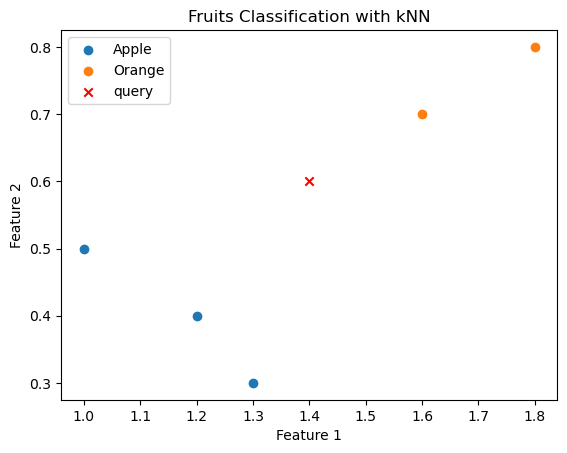

In [41]:
import math
import numpy as np
import matplotlib.pyplot as plt


def euclidean_distance(point1, point2):
    return math.sqrt(sum((p - q) ** 2 for p, q in zip(point1, point2)))


def k_nearest_neighbors(data, query, k, distance_fn):
    neighbor_distances_and_indices = []

    for index, (point, label) in enumerate(data):
        distance = distance_fn(point, query)
        neighbor_distances_and_indices.append((distance, index))

    k_nearest_distances_and_indices = sorted(neighbor_distances_and_indices)[:k]

    k_nearest_labels = [data[i][1] for distance, i in k_nearest_distances_and_indices]

    from collections import Counter
    most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]

    return most_common_label


fruits_data = [
    ((1.2, 0.4), 'Apple'),
    ((1.0, 0.5), 'Apple'),
    ((1.6, 0.7), 'Orange'),
    ((1.3, 0.3), 'Apple'),
    ((1.8, 0.8), 'Orange')
]

fruit_query = (1.4, 0.6)

predicted_type = k_nearest_neighbors(fruits_data, fruit_query, k=2, distance_fn=euclidean_distance)
print(predicted_type)

# Extract fruit features and labels
fruit_features = np.array([item[0] for item in fruits_data])
fruit_labels = np.array([item[1] for item in fruits_data])


# Create a scatter plot of apples and oranges
for fruit_type in ['Apple', 'Orange']:
    plt.scatter(
        fruit_features[fruit_labels==fruit_type, 0],
        fruit_features[fruit_labels==fruit_type, 1],
        label=fruit_type
    )

# Add the query point
plt.scatter(*fruit_query, color='red', label='query', marker='x')
plt.legend()
plt.title('Fruits Classification with kNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

ripe


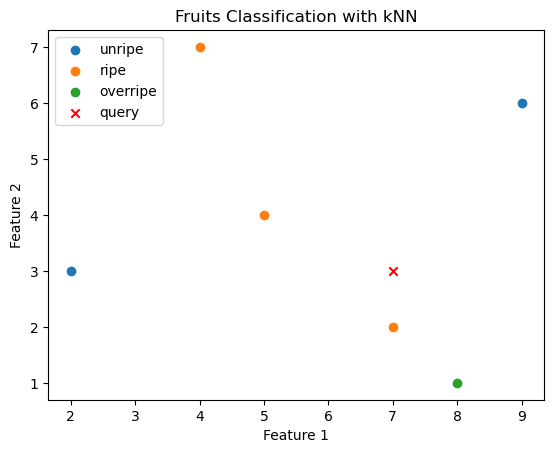

In [43]:
import math
import matplotlib.pyplot as plt
import numpy as np


def k_nearest_neighbors(data, query, k, distance_fn):
    neighbor_distances_and_indices = []
    for idx, label in enumerate(data):
        distance = distance_fn(label[0], query)
        neighbor_distances_and_indices.append((distance, idx))
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    k_nearest_labels = [data[i][1] for distance, i in k_nearest_distances_and_indices]
    return max(k_nearest_labels, key=k_nearest_labels.count)

def manhattan_distance(point1 , point2): 
    return sum(abs(p - q) for p,q in zip(point1 , point2))

def euclidean_distance(point1, point2):
    return math.sqrt(sum((p - q) ** 2 for p, q in zip(point1, point2)))


data = [
    ((2, 3), 'unripe'),
    ((5, 4), 'ripe'),
    ((9, 6), 'unripe'),
    ((4, 7), 'ripe'),
    ((8, 1), 'overripe'),
    ((7, 2), 'ripe'),
]

ripeness_label = k_nearest_neighbors(data, (7, 3), k=3, distance_fn=manhattan_distance)
print(ripeness_label)

features = np.array([item[0] for item in data])
labels = np.array([item[1] for item in data])

for ripeness in ['unripe', 'ripe', 'overripe']:
    plt.scatter(features[labels == ripeness, 0], features[labels == ripeness, 1], label=ripeness)

plt.scatter(7, 3, color='red', label='query', marker='x')
plt.legend()
plt.title('Fruits Classification with kNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [44]:
from collections import Counter

# Define the k_nearest_neighbors function as described in the lesson
def k_nearest_neighbors(data, query, k, distance_fn):
    neighbor_distances_and_indices = []
    
    # Compute distance from each training data point, using example[0] to get the feature data
    for idx, label in enumerate(data):
        distance = distance_fn(label[0], query)  
        neighbor_distances_and_indices.append((distance, idx))
    
    # Sort the list by distance and select the first k entries
    sorted_neighbors = sorted(neighbor_distances_and_indices)
    k_nearest_distances_and_indices = sorted_neighbors[:k]
    
    # TODO: Assign labels to k_nearest_labels based on the k_nearest_distances_and_indices
    k_nearest_labels = [data[i][1] for distance , i in k_nearest_distances_and_indices]  # Replace with the correct code
    
    # TODO: Use the Counter class for a majority vote to determine the predicted label
    most_common = max(k_nearest_labels , key = k_nearest_labels.count)  # Replace this line with the correct code

    return most_common

# Define the euclidean_distance function as needed
def euclidean_distance(point1, point2):
    return sum((p - q) ** 2 for p, q in zip(point1, point2)) ** 0.5

# A cosmic dataset of objects with features 'size' and 'brightness'
cosmic_objects = [
    ((1, 5), 'Dwarf Star'),  # Size 1, Brightness 5
    ((3, 8), 'Giant Star'),  # Size 3, Brightness 8
    ((2, 6), 'Dwarf Star'),  # Size 2, Brightness 6
]

# New object to classify
new_object = (2, 7)

# Using the defined functions to classify the new object
predicted_class = k_nearest_neighbors(cosmic_objects, new_object, k=2, distance_fn=euclidean_distance)
print(predicted_class)  # Predicted class is expected to be 'Dwarf Star'

Dwarf Star
